In [6]:
#import warnings
#warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, 

In [7]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

## The Data

In [8]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    print(dr)
    for category in CATEGORIES:
        #print(category)
        class_index = CATEGORIES.index(category)
        #print(class_index)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

07
05
06
02
04
00
08
09
03
01


[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [9]:
# shuffle the input data
import random
random.shuffle(image_data)

In [10]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [11]:
label[:10]

[6, 9, 7, 6, 5, 0, 7, 4, 9, 8]

## Data Visualisation

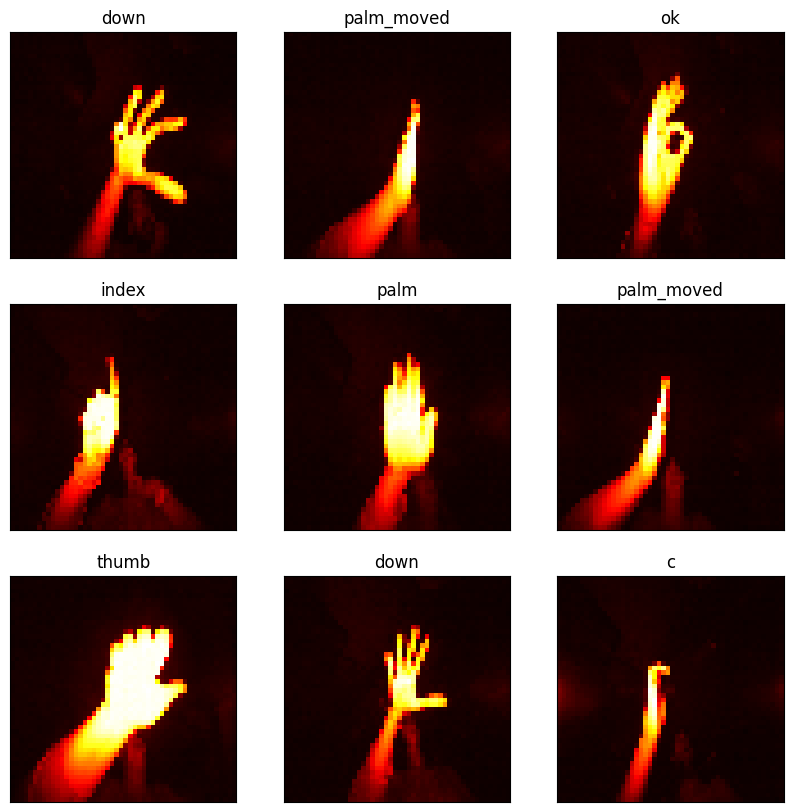

In [12]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [13]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [14]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

In [15]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [16]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [17]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


## The Model

In [18]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs = 15, batch_size=32, validation_data=(X_test, y_test),callbacks=[callback])

Epoch 1/15
438/438 [==============================] - 61s 137ms/step - loss: 0.2240 - accuracy: 0.9314 - val_loss: 0.0551 - val_accuracy: 0.9858
Epoch 2/15
438/438 [==============================] - 59s 135ms/step - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 3/15
438/438 [==============================] - 58s 133ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 3.9498e-04 - val_accuracy: 0.9998
Epoch 4/15
438/438 [==============================] - 59s 135ms/step - loss: 1.7374e-04 - accuracy: 0.9999 - val_loss: 4.6567e-04 - val_accuracy: 0.9998
Epoch 5/15
438/438 [==============================] - 59s 134ms/step - loss: 6.0577e-05 - accuracy: 1.0000 - val_loss: 6.8952e-04 - val_accuracy: 0.9997


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                        

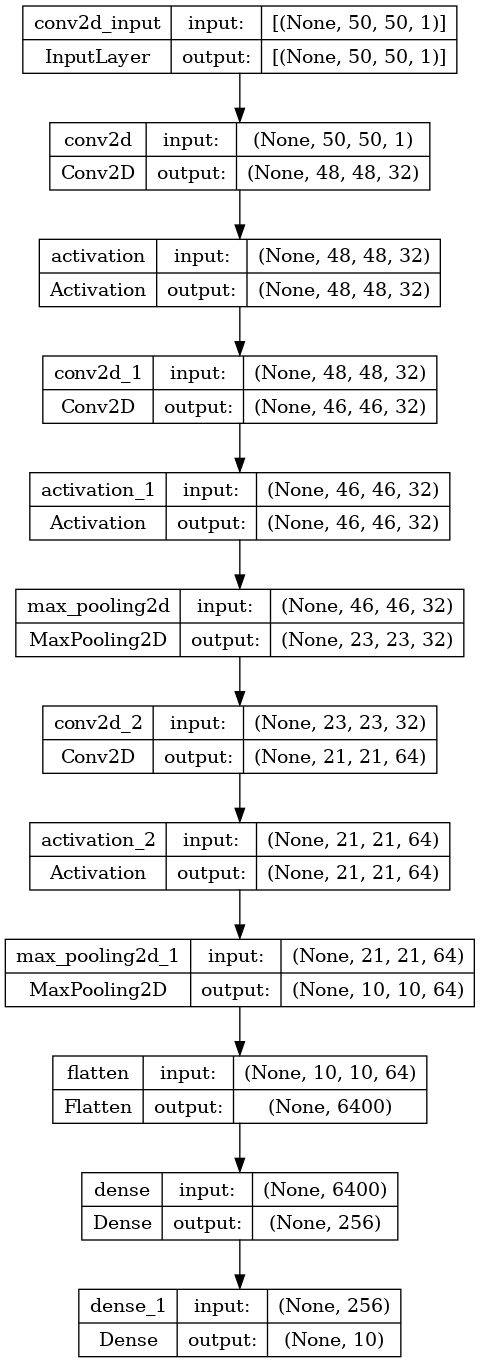

In [21]:
# This shows a pictorial representation of the model

import tensorflow as tf

tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

## Evaluation

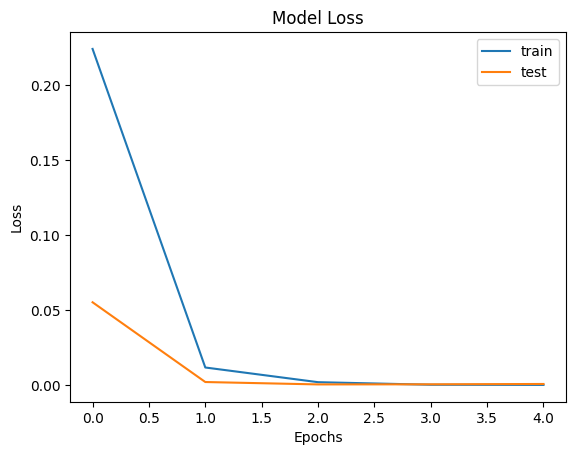

In [22]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

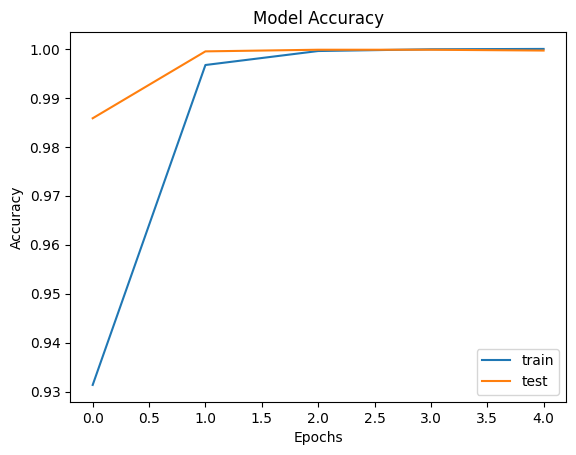

In [23]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [24]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 5s 28ms/step - loss: 6.8952e-04 - accuracy: 0.9997
Test accuracy: 99.97%


In [25]:
print(y_test[:8])

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


## Confusion Matrix

188/188 [==============================] - 5s 26ms/step
[[617   0   1   0   0   0   0   0   0   0]
 [  0 616   0   0   0   0   0   0   0   0]
 [  0   0 583   0   1   0   0   0   0   0]
 [  0   0   0 599   0   0   0   0   0   0]
 [  0   0   0   0 607   0   0   0   0   0]
 [  0   0   0   0   0 599   0   0   0   0]
 [  0   0   0   0   0   0 585   0   0   0]
 [  0   0   0   0   0   0   0 604   0   0]
 [  0   0   0   0   0   0   0   0 587   0]
 [  0   0   0   0   0   0   0   0   0 601]]


[]

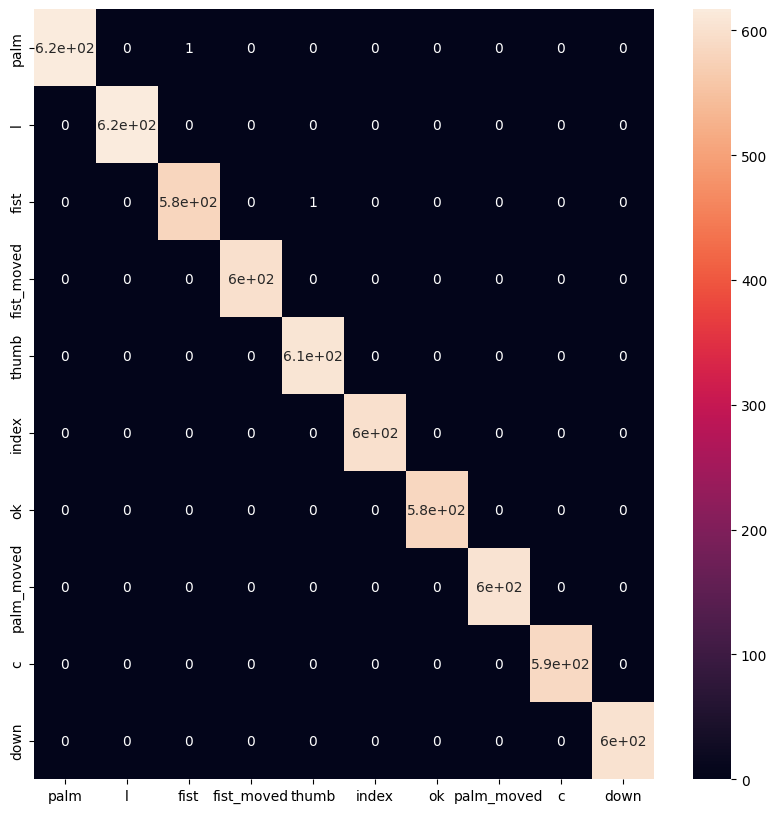

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
print(cm)
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

## Prediction

In [28]:
y_pred = model.predict(X_test)
a = []
for i in range(1,10):
    #print(X_test[5].T)
    a.append(np.squeeze(X_test[i].T))
a = np.array(a)

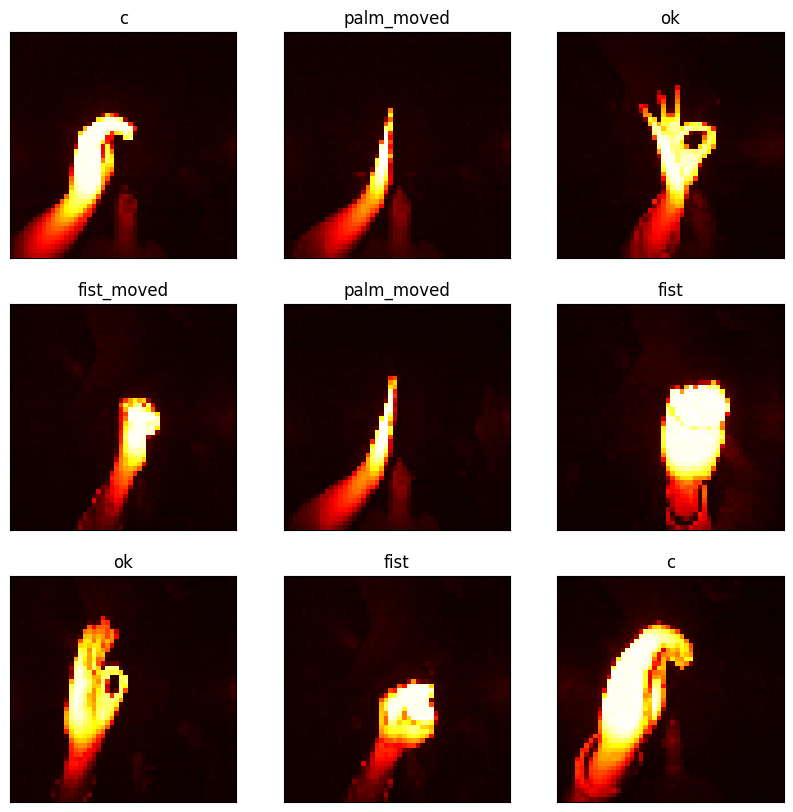

In [29]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(a[i-1].T, cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[np.argmax(y_pred[i])][3:])
plt.show()